In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# link = 'https://drive.google.com/open?id=1muL98bUHYZwC2KqacNEh3X9LOWHn_Z31'
link = 'https://drive.google.com/open?id=1vgcOOBuQxIZ5dvJPrRtF6dWfYpwBqm3X'

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1vgcOOBuQxIZ5dvJPrRtF6dWfYpwBqm3X


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('sent_tokens_nonascii2nd.csv')  
df3 = pd.read_csv('sent_tokens_nonascii2nd.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df3.shape

(212443, 11)

In [ ]:
df3.head()

,CIK,Name,Sector,Symbol,cik,file_sentences,filing_date,filing_section,filing_type,ticker,word_count
0,1037868,Ametek,Industrials,AME,1037868,You should consider carefully the following ri...,20141231,Item1A,10K,AME,NaN
1,1037868,Ametek,Industrials,AME,1037868,A downturn in the economy generally or in the ...,20141231,Item1A,10K,AME,NaN
2,1037868,Ametek,Industrials,AME,1037868,Several of the industries in which we operate ...,20141231,Item1A,10K,AME,NaN
3,1037868,Ametek,Industrials,AME,1037868,Our growth strategy includes strategic acquisi...,20141231,Item1A,10K,AME,NaN
4,1037868,Ametek,Industrials,AME,1037868,A portion of our growth has been attributed to...,20141231,Item1A,10K,AME,NaN


In [ ]:
df3_count = df3.groupby('Name').agg({"file_sentences": "nunique"}).reset_index()

In [ ]:
df3_count.agg({"file_sentences": "mean"})

file_sentences    829.108974
dtype: float64

In [ ]:
df3_sector_count = df3.groupby(['Sector', 'Name']).agg({"file_sentences": "nunique"}).reset_index()

In [ ]:
df3_sector_count.groupby('Sector').agg({"file_sentences": "mean"})

,file_sentences
Sector,
Communication Services,737.272727
Consumer Discretionary,803.928571
Consumer Staples,564.333333
Energy,551.363636
Financials,1349.368421
Health Care,1064.454545
Industrials,620.935484
Information Technology,899.769231
Materials,560.833333


In [ ]:
df3['ticker'].nunique()

156

In [ ]:
df3.groupby('Sector').agg({"ticker": "nunique"}).reset_index()

,Sector,ticker
0,Communication Services,11
1,Consumer Discretionary,14
2,Consumer Staples,18
3,Energy,11
4,Financials,19
5,Health Care,11
6,Industrials,31
7,Information Technology,13
8,Materials,12
9,Real Estate,6


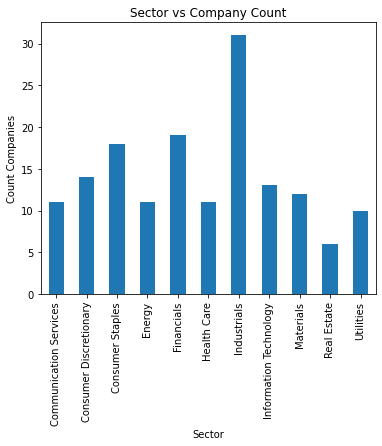

In [ ]:
dfg = df3.groupby(['Sector'])['ticker'].nunique()
# dfg.head()
dfg.plot(kind='bar', title='Sector vs Company Count', ylabel='Count Companies',
         xlabel='Sector', figsize=(6, 5))

In [ ]:
def word_count(string):
    return(len(string.strip().split(" ")))

In [ ]:
df3_exp = df3

In [ ]:
df3_exp['word_count'] = df3_exp.apply(lambda row : word_count(row['file_sentences']), axis = 1)

In [ ]:
corpus = df3.file_sentences

In [ ]:
corpus_list = df3.file_sentences.to_list()

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 4.8 MB/s 
     |████████████████████████████████| 3.4 MB 16.5 MB/s 
     |████████████████████████████████| 6.8 MB 99.0 MB/s 
     |████████████████████████████████| 1.2 MB 84.3 MB/s 
     |████████████████████████████████| 61 kB 690 kB/s 
     |████████████████████████████████| 596 kB 74.7 MB/s 
     |████████████████████████████████| 895 kB 74.4 MB/s 
     |████████████████████████████████| 3.3 MB 75.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=9b2cfcb692efead9f50fa89f7d983c0bb0d426cc77e3e755ce54e347f083f289
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer, util
# embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# embedder = SentenceTransformer('msmarco-distilbert-base-v2')
embedder = SentenceTransformer('multi-qa-mpnet-base-dot-v1')
# new embedder to try out here --- multi-qa-mpnet-base-dot-v1 --6-7% better accuracy than distilbert

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.40k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import torch

In [ ]:
corpus_embeddings = embedder.encode(df3.file_sentences.to_list(), convert_to_tensor = True)

In [ ]:
queries_acquire = ['acquiring aquire acquired acquires acquisition reacquire purchase Acquire Acquiring buy divest sell toacquire aquired procure develop Merger merging acquisition takeover mergers merge transaction merged amalgamation demerger megamerger consolidation mega_mergers acquisiton reorganization thetransaction Proposed_Merger recapitalization synergies takeover_bid consolidations Consolidation consolidating restructuring MOSAID_licensees reorganization merger consolidate Classically_storage rationalization securitized_Timeshare_notes regionalization centralization downsizing Jianhe_project mergers shakeout']

# use word2 vec
#make a acquisition query
#make a fraud query 
#new branch/headquarter
#all queries separately

In [ ]:
top_k = min(20000, len(corpus_list))

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
df3_new_acquire = pd.DataFrame(columns = ['ticker','sector', 'cik', 'filing_type','filing_date','filing_section','file_sentences', 'cosine_score', 'label'])
for query in queries_acquire:
  query_embedding = embedder.encode(query, convert_to_tensor=True)

  # we use cosing similarity and torch.topk to find the highest 5 scores
  cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
  top_results = torch.topk(cos_scores, k=top_k)

  print("\n\n======================\n\n")
  print("Query: ", query)
  print(cos_scores)
  indexes_int=[]   
  for score, idx in zip(top_results[0], top_results[1]):
    # print(format(score))    
    val = idx.cpu().numpy()
    if score > 0.40:
      df3_new_acquire = df3_new_acquire.append({'ticker': df3.loc[val].ticker,'sector': df3.loc[val].Sector, 'cik': df3.loc[val].cik,'filing_type': df3.loc[val].filing_type,
                   'filing_date': df3.loc[val].filing_date, 'filing_section': df3.loc[val].filing_section,
                    'file_sentences': df3.loc[val].file_sentences, 'cosine_score': format(score), 'label':'acquire'}, ignore_index = True)





Query:  acquiring aquire acquired acquires acquisition reacquire purchase Acquire Acquiring buy divest sell toacquire aquired procure develop Merger merging acquisition takeover mergers merge transaction merged amalgamation demerger megamerger consolidation mega_mergers acquisiton reorganization thetransaction Proposed_Merger recapitalization synergies takeover_bid consolidations Consolidation consolidating restructuring MOSAID_licensees reorganization merger consolidate Classically_storage rationalization securitized_Timeshare_notes regionalization centralization downsizing Jianhe_project mergers shakeout
tensor([0.3232, 0.3514, 0.2954,  ..., 0.2239, 0.3779, 0.3958], device='cuda:0')


In [ ]:
len(df3_new_acquire)

18234

In [ ]:
df3_new_acquire.head()

,ticker,sector,cik,filing_type,filing_date,filing_section,file_sentences,cosine_score,label
0,DISCA,Communication Services,1437107,10K,20141231,Item1A,"engaging in a merger, consolidation or other b...",0.7017663717269897,acquire
1,DISCA,Communication Services,1437107,10K,20151231,Item1A,"engaging in a merger, consolidation or other b...",0.7017663717269897,acquire
2,DISCA,Communication Services,1437107,10K,20161231,Item1A,"engaging in a merger, consolidation or other b...",0.7017663717269897,acquire
3,DISCA,Communication Services,1437107,10K,20171231,Item1A,"engaging in a merger, consolidation or other b...",0.7017663717269897,acquire
4,DISCA,Communication Services,1437107,10K,20181231,Item1A,"engaging in a merger, consolidation or other b...",0.7017663717269897,acquire


In [ ]:
df3_new_acquire['cosine_score'].min()

'0.40000659227371216'

In [ ]:
df3_new_acquire.to_csv('acquire_relevant_sents.csv')

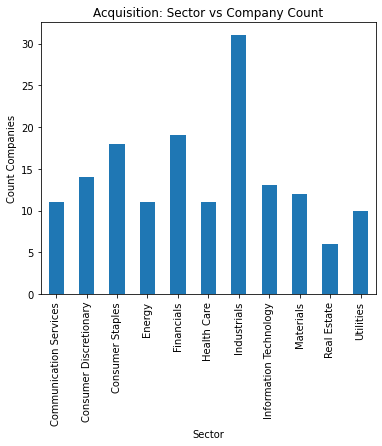

In [ ]:
dfg_acquire = df3_new_acquire.groupby(['sector'])['ticker'].nunique()
dfg_acquire.plot(kind='bar', title='Acquisition: Sector vs Company Count', ylabel='Count Companies',
         xlabel='Sector', figsize=(6, 5))

In [ ]:
queries_scams = ['scams Scam swindle scammers frauds phishing_scam scamming fraud scammer Scams Litigation litigating litigations lawsuits patent_litigation protracted_litigation pending_litigation litigate frauds fraudulent Fraud scam identity_theft lawsuits sued countersuit suit lawsuit_alleging suing defamation_lawsuit trademark_infringement_lawsuit counterclaim sue complaint plaintiffs wrongful_death wrongful_termination_lawsuit wrongful_termination_suit Lawsuit wrongful_dismissal_lawsuit filed_countersuit lawsuits_alleging whistleblower_lawsuit sued suing sues lawsuit countersue sueing']

In [ ]:
df3_new_scams = pd.DataFrame(columns = ['ticker','sector', 'cik', 'filing_type','filing_date','filing_section','file_sentences', 'cosine_score', 'label'])
for query in queries_scams:
  query_embedding = embedder.encode(query, convert_to_tensor=True)

  # we use cosing similarity and torch.topk to find the highest 5 scores
  cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
  top_results = torch.topk(cos_scores, k=top_k)

  print("\n\n======================\n\n")
  print("Query: ", query)
  indexes_int=[]   
  for score, idx in tqdm(zip(top_results[0], top_results[1])):    
    val = idx.cpu().numpy()
    if score > 0.40:
      df3_new_scams = df3_new_scams.append({'ticker': df3.loc[val].ticker,'sector': df3.loc[val].Sector, 'cik': df3.loc[val].cik,'filing_type': df3.loc[val].filing_type,
                   'filing_date': df3.loc[val].filing_date, 'filing_section': df3.loc[val].filing_section,
                    'file_sentences': df3.loc[val].file_sentences, 'cosine_score': format(score), 'label':'scams'}, ignore_index = True)





Query:  scams Scam swindle scammers frauds phishing_scam scamming fraud scammer Scams Litigation litigating litigations lawsuits patent_litigation protracted_litigation pending_litigation litigate frauds fraudulent Fraud scam identity_theft lawsuits sued countersuit suit lawsuit_alleging suing defamation_lawsuit trademark_infringement_lawsuit counterclaim sue complaint plaintiffs wrongful_death wrongful_termination_lawsuit wrongful_termination_suit Lawsuit wrongful_dismissal_lawsuit filed_countersuit lawsuits_alleging whistleblower_lawsuit sued suing sues lawsuit countersue sueing


20000it [01:09, 287.30it/s]  


In [ ]:
len(df3_new_scams)

11033

In [ ]:
df3_new_scams.head()

,ticker,sector,cik,filing_type,filing_date,filing_section,file_sentences,cosine_score,label
0,DGX,Health Care,1022079,10K,20181231,Item1A,expenditure of large amounts of cash on legal ...,0.6009306907653809,scams
1,DGX,Health Care,1022079,10K,20141231,Item1A,expenditure of large amounts of cash on legal ...,0.6009306311607361,scams
2,DGX,Health Care,1022079,10K,20151231,Item1A,expenditure of large amounts of cash on legal ...,0.6009306311607361,scams
3,DGX,Health Care,1022079,10K,20161231,Item1A,expenditure of large amounts of cash on legal ...,0.6009306311607361,scams
4,DGX,Health Care,1022079,10K,20171231,Item1A,expenditure of large amounts of cash on legal ...,0.6009306311607361,scams


In [ ]:
df3_new_scams.to_csv('scams_relevant_sents.csv')

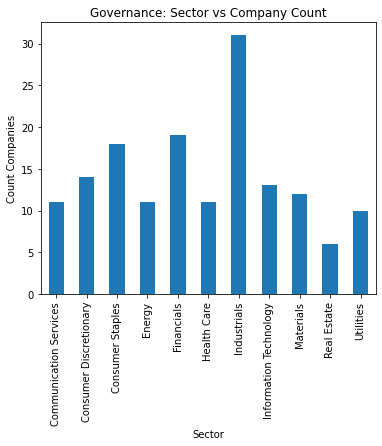

In [ ]:
dfg_scams = df3_new_scams.groupby(['sector'])['ticker'].nunique()
dfg_scams.plot(kind='bar', title='Governance: Sector vs Company Count', ylabel='Count Companies',
         xlabel='Sector', figsize=(6, 5))

In [ ]:
queries_expansion = ['launching launches lauch launched Launching relaunch Launch unveiling unveil launced relaunched rollout launchs lauching Launched introduce lauched introduction expansions Expansion expanding expand growth expanded Expansions development buildout Expanding revamped thenew newest']

In [ ]:
df3_new_expansion = pd.DataFrame(columns = ['ticker','sector', 'cik', 'filing_type','filing_date','filing_section','file_sentences', 'cosine_score', 'label'])
for query in queries_expansion:
  query_embedding = embedder.encode(query, convert_to_tensor=True)

  # we use cosing similarity and torch.topk to find the highest 5 scores
  cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
  top_results = torch.topk(cos_scores, k=top_k)

  print("\n\n======================\n\n")
  print("Query: ", query)
  indexes_int=[]   
  for score, idx in tqdm(zip(top_results[0], top_results[1])):    
    val = idx.cpu().numpy()
    if score > 0.40:
      df3_new_expansion = df3_new_expansion.append({'ticker': df3.loc[val].ticker,'sector': df3.loc[val].Sector,  'cik': df3.loc[val].cik,'filing_type': df3.loc[val].filing_type,
                   'filing_date': df3.loc[val].filing_date, 'filing_section': df3.loc[val].filing_section,
                    'file_sentences': df3.loc[val].file_sentences, 'cosine_score': format(score), 'label':'expansion'}, ignore_index = True)





Query:  launching launches lauch launched Launching relaunch Launch unveiling unveil launced relaunched rollout launchs lauching Launched introduce lauched introduction expansions Expansion expanding expand growth expanded Expansions development buildout Expanding revamped thenew newest


20000it [01:12, 275.67it/s]  


In [ ]:
df3_new_expansion.head()

,ticker,sector,cik,filing_type,filing_date,filing_section,file_sentences,cosine_score,label
0,CMCSA,Communication Services,902739,10K,20161231,Item1,We continue to focus on technology initiatives...,0.6534713506698608,expansion
1,CMCSA,Communication Services,902739,10K,20141231,Item1,We continue to focus on technology initiatives...,0.6473931074142456,expansion
2,CMCSA,Communication Services,902739,10K,20151231,Item1,We continue to focus on technology initiatives...,0.6473931074142456,expansion
3,URI,Industrials,1047166,10K,20191231,Item1A,announcements of developments related to our b...,0.6454570889472961,expansion
4,URI,Industrials,1047166,10K,20141231,Item1A,announcements of developments related to our b...,0.6454570293426514,expansion


In [ ]:
df3_new_expansion.to_csv('expansion_relevant_sents.csv')

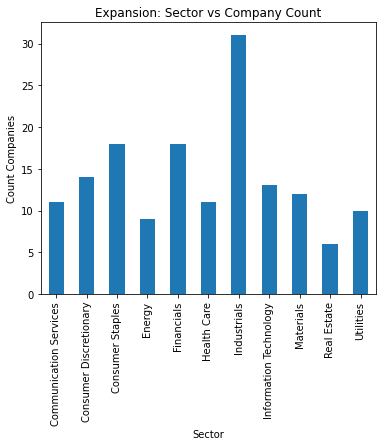

In [ ]:
dfg_expansion = df3_new_expansion.groupby(['sector'])['ticker'].nunique()
# dfg.head()
dfg_expansion.plot(kind='bar', title='Expansion: Sector vs Company Count', ylabel='Count Companies',
         xlabel='Sector', figsize=(6, 5))